In [22]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Importing library for splitting the data
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing regression models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Germany.csv")
df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,...,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,T. Kroos,28,Germany,90,90,76500000.0,355000.0,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,8.0,"Jul 17, 2014",0,2022,6'0,168lbs,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,...,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M,Midfielder,26-30
1,M. ter Stegen,26,Germany,89,92,58000000.0,240000.0,1328,Right,3.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,22.0,"Jul 1, 2014",0,2022,6'2,187lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M,Goalkeeper,26-30
2,M. Neuer,32,Germany,89,89,38000000.0,130000.0,1473,Right,5.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 1, 2011",0,2021,6'4,203lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M,Goalkeeper,31-35
3,M. Hummels,29,Germany,88,88,46000000.0,160000.0,2038,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,LCB,5.0,"Jul 1, 2016",0,2021,6'3,203lbs,69+3,69+3,69+3,68+3,69+3,69+3,69+3,68+3,71+3,71+3,71+3,70+3,77+3,77+3,77+3,70+3,78+3,83+3,...,85+3,85+3,80+3,64.0,55.0,87.0,81.0,60.0,68.0,65.0,53.0,85.0,81.0,53.0,64.0,63.0,87.0,60.0,71.0,68.0,66.0,84.0,51.0,69.0,92.0,56.0,79.0,68.0,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,€75.9M,Defender,26-30
4,L. Sané,22,Germany,86,92,61000000.0,195000.0,2090,Left,2.0,3.0,4.0,High/ Medium,Lean,Yes,LW,19.0,"Aug 2, 2016",0,2021,6'0,165lbs,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,82+2,82+2,82+2,83+2,74+2,74+2,74+2,83+2,65+2,59+2,...,52+2,52+2,61+2,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M,Attacker,22-25


In [3]:
df['Position'].value_counts()

GK     164
CB     128
ST     104
LM      94
RM      88
RB      83
LB      79
CDM     79
CAM     62
CM      60
RCB     48
LCB     39
RDM     24
LDM     23
RS      19
LS      18
RCM     18
LCM     17
LW      12
RW      11
RWB      9
LWB      7
CF       5
0        3
RF       1
LAM      1
RAM      1
LF       1
Name: Position, dtype: int64

In [4]:
ageBins = [15, 21, 25, 30, 35, 40, 45]
ranges = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Ranges'] = pd.cut(df['Age'], bins = ageBins, labels = ranges)
df['Age_Ranges'].value_counts()

22-25    377
16-21    363
26-30    351
31-35    102
36-40      5
41-45      0
Name: Age_Ranges, dtype: int64

In [5]:
maxEarners= df[['Name','Value', 'Wage']].nlargest(11,'Wage', keep = 'first')
maxEarners = maxEarners.set_index('Name')
maxEarners.head()

,Value,Wage
Name,,
T. Kroos,76500000.0,355000.0
M. ter Stegen,58000000.0,240000.0
L. Sané,61000000.0,195000.0
M. Özil,43500000.0,190000.0
I. Gündoğan,32000000.0,175000.0


Text(0, 0.5, 'Wage')

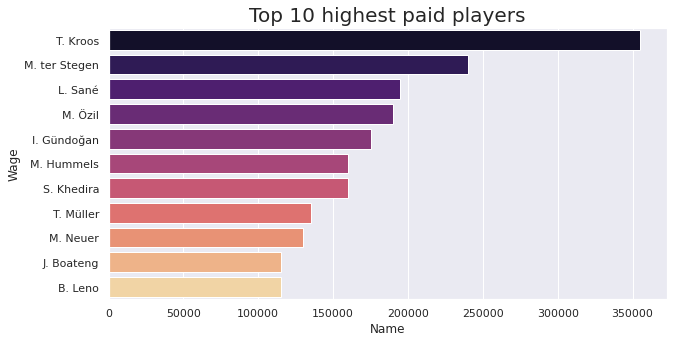

In [6]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = maxEarners['Wage'], y = maxEarners.index,  palette = 'magma')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

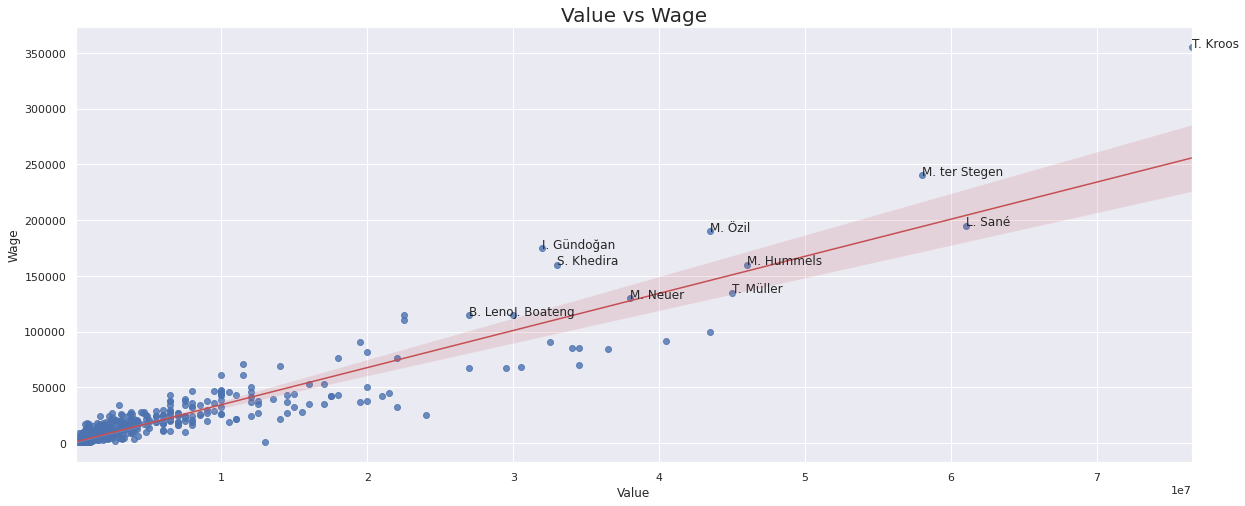

In [7]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (maxEarners['Value'][i],maxEarners['Wage'][i]))

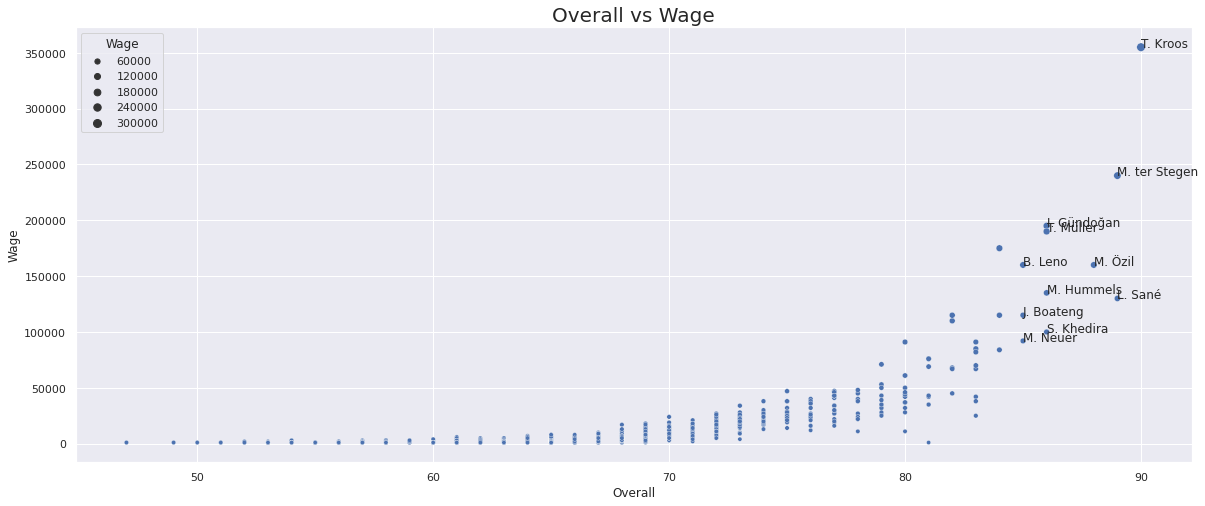

In [8]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Overall', y = 'Wage' , data = df, size='Wage')
plt.title('Overall vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (df['Overall'][i],df['Wage'][i]))

Text(0.5, 1.0, 'Wage vs Position Class')

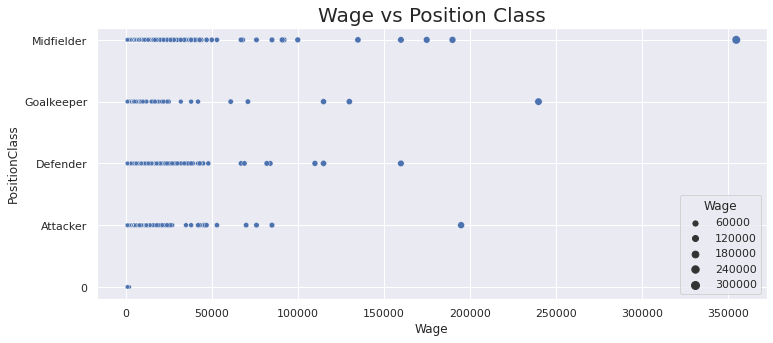

In [9]:
plt.figure(figsize=(12,5))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Wage', y = 'PositionClass' , data = df,size='Wage')
plt.title('Wage vs Position Class', fontsize = 20)

In [10]:
cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Skill Moves','Dribbling', 'Curve',
      'FKAccuracy', 'LongPassing', 'BallControl', 'Agility', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
      'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Reactions', 'Aggression',
      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
      'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][0]))
    i += 1

Best Crossing : P. Max
Best Finishing : T. Müller
Best HeadingAccuracy : M. Hummels
Best ShortPassing : T. Kroos
Best Volleys : M. Reus
Best Skill Moves : B. Manu
Best Dribbling : L. Sané
Best Curve : J. Geis
Best FKAccuracy : T. Kroos
Best LongPassing : T. Kroos
Best BallControl : T. Kroos
Best Agility : S. Bigalke
Best Acceleration : L. Sané
Best SprintSpeed : L. Sané
Best Agility : S. Bigalke
Best Reactions : T. Müller
Best Balance : L. Ayçiçek
Best ShotPower : L. Podolski
Best Jumping : R. Gosens
Best Stamina : M. Eggestein
Best Strength : N. Süle
Best LongShots : T. Kroos
Best Reactions : T. Müller
Best Aggression : D. Erdmann
Best Interceptions : M. Hummels
Best Positioning : T. Müller
Best Vision : M. Özil
Best Penalties : M. Kruse
Best Composure : M. Hummels
Best Marking : M. Hummels
Best StandingTackle : M. Hummels
Best SlidingTackle : M. Hummels
Best GKDiving : M. Neuer
Best GKHandling : M. Neuer
Best GKKicking : M. Neuer
Best GKPositioning : M. Neuer
Best GKReflexes : M. ter

In [11]:
target = "Overall"
predictors = list(df.columns)
for r in [target,"Name","Age","Nationality","Position","Weak Foot","Preferred Foot", "Work Rate"]:
  predictors.remove(r)
#print(target,predictors)

In [12]:
def numColumns(col):
    if type(list(df[col])[0]) == float:
        return col

numberPreds = []

for c in df.columns:
    temp = numColumns(c)
    if temp != None:
        numberPreds.append(temp)

#numberPreds

In [13]:
scaler = StandardScaler()
numberPreds.append(target)
# print(predictors,target)
scaled_df = pd.DataFrame(data=scaler.fit_transform(df[numberPreds]),columns=numberPreds)

numberPreds.remove(target)

X = scaled_df[numberPreds]
y = scaled_df[target]

print(X.shape,y.shape)

(1198, 40) (1198,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state= 1)
mlpReg = MLPRegressor(max_iter=150)
mlpReg.fit(X_train.values,y_train.values)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=150,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [15]:
preds = mlpReg.predict(X_test)
score = r2_score(y_test,preds)

In [16]:
mae_mlp = mean_absolute_error(y_test,preds)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_mlp)
#This is the weighted variance in our calculations 1.0 is maximum
print('R2 score:', score)

Mean-Absolute-Error:  0.2167562913143649
R2 score: 0.9211225374910827


In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
preds_lr = lr.predict(X_test)
score_lr = r2_score(y_test,preds_lr)
mae_lr = mean_absolute_error(y_test,preds_lr)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_lr)
#This is the weighted variance in our calculations 1.0 is maximum
print('R2 score:', score_lr)

Mean-Absolute-Error:  0.2871412067663844
R2 score: 0.8532198232957389


In [19]:
random = RandomForestRegressor(n_jobs=-1, n_estimators=100)
random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
preds_rf = random.predict(X_test)
score_rf = r2_score(y_test,preds_rf)
mae_rf = mean_absolute_error(y_test,preds_rf)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_rf)
#This is the weighted variance in our calculations 1.0 is maximum
print ('R2 score: ', score_rf)

Mean-Absolute-Error:  0.1300487832602344
R2 score:  0.9687582098098801


In [26]:
# There are a number of hyperparamaters that can be explored 

# Number of trees in random forest; default is 100
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Criterion used to guide data splits
# criterion = ['gini', 'entropy']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [1, 2, 4]

# Number of features to consider at every split
# default is auto (which is equivalent to sqrt)
max_features = ['auto']

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [None]

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [0.001, 0.005, 0.01, 0.05]

# Method of selecting samples for training each tree
# default = True,  If False, the whole dataset is used to build each tree.
bootstrap = [True]

# Create the random grid
param_grid_random = {'n_estimators': n_estimators,
                      # 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_features': max_features,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                      'bootstrap': bootstrap,
                     }

In [27]:
# Use the param_grid_random for an initial "rough" search using Randomized search
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
randomSearch = RandomizedSearchCV(estimator = rf, param_distributions = param_grid_random, n_iter = 300, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
randomSearch.fit(X_train, y_train)
bestRandomModel = randomSearch.best_estimator_
print('Best parameters found: ', randomSearch.best_params_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 28.7min finished


Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}


In [28]:
preds_rf_rv = bestRandomModel.predict(X_test)
score_rf_rv = r2_score(y_test,preds_rf_rv)
mae_rf_rv = mean_absolute_error(y_test,preds_rf_rv)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_rf_rv)
#This is the weighted variance in our calculations 1.0 is maximum
print ('R2 score: ', score_rf_rv)

Mean-Absolute-Error:  0.15214838674003026
R2 score:  0.9594284853789088


In [29]:
# let's take the best parameters from the the random search, and use this as a base for gridsearch
param_grid = {'n_estimators': [100, 150, 200, 250, 300],
              'min_samples_split': [1, 3, 5, 7, 9],  
              'min_samples_leaf': [1, 2, 3],
              'min_impurity_decrease': [0.000, 0.0005, 0.001, 0.0015, 0.002],
              'max_leaf_nodes': [None], 
              'max_features': ['auto'], 
              'max_depth': [70, 75, 80, 85, 90],
              'bootstrap': [True]}

In [31]:
# refine our search using param_grid
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gridSearch = GridSearchCV(estimator = rf, param_grid=param_grid, cv = 3, verbose=2,  n_jobs = -1)
# Fit the random search model
gridSearch.fit(X_train, y_train)
bestGridModel = gridSearch.best_estimator_
print('Best parameters found: ', gridSearch.best_params_)

Fitting 3 folds for each of 1875 candidates, totalling 5625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 1993 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 2600 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 3289 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 4058 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done 4909 tasks      | elapsed: 59.6min
[Parallel(n_jobs=-1)]: Done 5625 out of 5625 | elapsed: 68.0min finished


Best parameters found:  {'bootstrap': True, 'max_depth': 90, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


In [32]:
preds_rf_g = bestGridModel.predict(X_test)
score_rf_g = r2_score(y_test,preds_rf_g)
mae_rf_g = mean_absolute_error(y_test,preds_rf_g)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_rf_g)
#This is the weighted variance in our calculations 1.0 is maximum
print ('R2 score: ', score_rf_g)

Mean-Absolute-Error:  0.13245333107572302
R2 score:  0.9678704308812749
